In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Model
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
#from kt_utils import *

In [4]:
data_ip = pd.read_csv("C:\\Users\\admin\\Documents\\Face_expressions\\train.csv")
data_ip.head()

,Emotion,Pixels
0,3,221 240 251 254 255 255 255 255 255 255 255 25...
1,6,100 107 108 104 103 113 117 115 120 130 138 14...
2,4,35 50 56 57 63 76 74 79 85 86 105 133 145 152 ...
3,6,119 124 129 135 136 140 142 149 159 156 163 16...
4,2,160 173 186 194 188 185 175 162 153 143 135 12...


In [5]:
X = data_ip['Pixels']
Y = data_ip['Emotion']
X = X.str.split(' ')

In [6]:
X = np.array(X)
X = [list(map(int, i)) for i in X]
X = [np.array(i) for i in X]
X = np.array(X)
X.shape

(4178, 2304)

In [7]:
X = X.reshape(X.shape[0],48,48)

In [9]:
X_train = X[:-500,:,:]
X_test = X[-500:,:,:]

X_train.shape,X_test.shape
X_train = X_train/255.

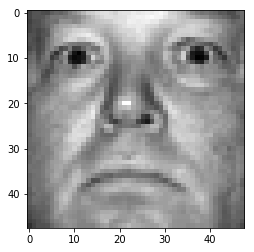

In [10]:
plt.imshow(X_train[1],cmap='gray')

In [11]:
P = []
Y = data_ip['Emotion']
for i in range(0,len(Y)):
    Y_op = [0]*7
    #print(Y[i])
    Y_op[Y[i]-1] = 1
    P.append(Y_op)
P = np.array(P)
Y_train = P[:-500]
Y_test = P[-500:]
'''Y = np.array(data_ip['Emotion'])
Y_train = Y[:-500]
Y_test = Y[-500:]'''
Y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)

In [17]:
def EmotionModel(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(filters = 16 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv1')(X_input)
    X = BatchNormalization(axis=3,name = 'batch1')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 32 , kernel_size = [8,8], strides=(1, 1), padding='valid',name = 'conv2')(X)
    X = BatchNormalization(axis=3, name = 'batch2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 64 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv3')(X)
    X = BatchNormalization(axis=3, name = 'batch3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 128 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv4')(X)
    X = BatchNormalization(axis=3, name = 'batch4')(X)
    X = Activation('relu')(X)
    
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    
    X = Dense(7, activation='softmax',name = 'actv')(X)
    print(X)
    model = Model(inputs = X_input,outputs = X,name = 'EmotionModel')
    
    
    return model

In [18]:
emotionModel = EmotionModel(input_shape=(48,48,1))

Tensor("actv_1/Softmax:0", shape=(?, 7), dtype=float32)


In [19]:
emotionModel.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
emotionModel.fit(X_train, Y_train,epochs=20, batch_size=32)

Epoch 1/20
3678/3678 [==============================] - 581s 158ms/step - loss: 0.1656 - acc: 0.3187
Epoch 2/20
3678/3678 [==============================] - 570s 155ms/step - loss: 0.1271 - acc: 0.4304
Epoch 3/20
3678/3678 [==============================] - 632s 172ms/step - loss: 0.1056 - acc: 0.5324
Epoch 4/20
3678/3678 [==============================] - 553s 150ms/step - loss: 0.0929 - acc: 0.5935
Epoch 5/20
3678/3678 [==============================] - 620s 169ms/step - loss: 0.0976 - acc: 0.5775
Epoch 6/20
3678/3678 [==============================] - 615s 167ms/step - loss: 0.0880 - acc: 0.6188
Epoch 7/20
3678/3678 [==============================] - 559s 152ms/step - loss: 0.0831 - acc: 0.6430
Epoch 8/20
3678/3678 [==============================] - 572s 155ms/step - loss: 0.0802 - acc: 0.6566
Epoch 9/20
3678/3678 [==============================] - 638s 173ms/step - loss: 0.0729 - acc: 0.6887
Epoch 10/20
3678/3678 [==============================] - 575s 156ms/step - loss: 0.0694 - a

In [22]:
X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [94]:
X_test = X_test/255.

In [95]:
preds = emotionModel.predict(X_test, batch_size=16)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = [1.4529396e-06 1.3389008e-05 9.9997950e-01 8.5522975e-09 3.0517691e-07
 7.6937835e-07 4.5105003e-06]
Test Accuracy = [4.5296680e-03 1.8823349e-01 1.1712290e-08 2.9393943e-04 9.7951889e-02
 6.2521821e-01 8.3772704e-02]


In [28]:
from keras import losses
losses.mean_squared_error(preds, Y_test)

<tf.Tensor 'Mean:0' shape=(500,) dtype=float64>

neutral


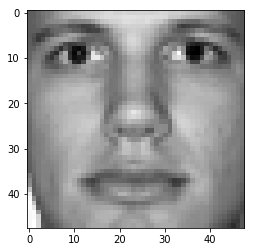

In [125]:

x_t = X_test[-19]
x_k = x_t.reshape(1,48,48,1)
x_p = x_t.reshape(48,48)

preds = emotionModel.predict(x_k, batch_size=16)

dict1 = {0:"anger", 1:"disgust", 2:"fear", 3:"happy", 4:"sad", 5:"surprise", 6:"neutral"}
if(np.argmax(preds)==6):
    print(dict1[0])
else:
    print(dict1[np.argmax(preds)+1])

plt.imshow(x_p,cmap='gray')

Emotion Detected:    fear


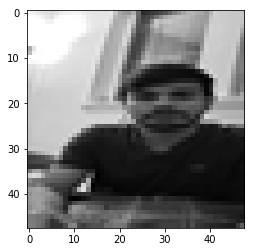

In [197]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
I = Image.open('C:\\Users\\admin\\Documents\\Images\\simg2.jpeg').convert('L')
I = I.resize((48,48), Image.ANTIALIAS)
K = I
plt.imshow(I,cmap = 'gray')
I = np.array(I)
I = I.reshape(1,I.shape[0],I.shape[1],1)
I = I/255.
preds = emotionModel.predict(I, batch_size=16)
#print(preds)
plt.imshow(K,cmap = 'gray')
if(np.argmax(preds)==6):
    print(dict1[0])
else:
    print("Emotion Detected:   ",dict1[np.argmax(preds)+1])


Emotion Detected:    happy


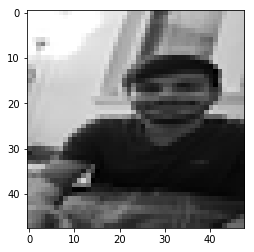

In [198]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
I = Image.open('C:\\Users\\admin\\Documents\\Images\\simg1.jpeg').convert('L')
I = I.resize((48,48), Image.ANTIALIAS)
K = I
plt.imshow(I,cmap = 'gray')
I = np.array(I)
I = I.reshape(1,I.shape[0],I.shape[1],1)
I = I/255.
preds = emotionModel.predict(I, batch_size=16)
plt.imshow(K,cmap = 'gray')
if(np.argmax(preds)==6):
    print(dict1[0])
else:
    print("Emotion Detected:   ",dict1[np.argmax(preds)+1])

anger


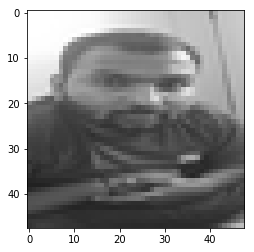

In [199]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
I = Image.open('C:\\Users\\admin\\Documents\\Images\\img6.jpeg').convert('L')
I = I.resize((48,48), Image.ANTIALIAS)
K = I
plt.imshow(I,cmap = 'gray')
I = np.array(I)
I = I.reshape(1,I.shape[0],I.shape[1],1)
I = I/255.
preds = emotionModel.predict(I, batch_size=16)
plt.imshow(K,cmap = 'gray')
if(np.argmax(preds)==6):
    print(dict1[0])
else:
    print("Emotion Detected:   ",dict1[np.argmax(preds)+1])

In [185]:
emotionModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 43, 43, 16)        592       
_________________________________________________________________
batch1 (BatchNormalization)  (None, 43, 43, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 43, 43, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 36, 36, 32)        32800     
_________________________________________________________________
batch2 (BatchNormalization)  (None, 36, 36, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 36, 36, 32)        0         
__________

In [193]:
score, acc = emotionModel.evaluate(X_test, Y_test,
                            batch_size=16)
print("Loss:",score,"Test Accuracy:",acc)

500/500 [==============================] - 14s 28ms/step
Loss: 0.06083464923501015 Test Accuracy: 0.72


Algorithm achieved 82% accuracy over Train Accuracy and 72% accuracy over Test Data.